# Observar como cambia la función de correlación con el número de puntos aleatorios. a) Usando 1 archivo con 1, 5, 10 y 50 veces el número de puntos que los datos, y promedia los histogramas b) Usando 1 archivo con 1, 5, 10 y 50 veces el número de puntos que los datos, y promedia las funciones de correlación c) Usando 1, 5, 10 y 50 archivos de muestras aleatorias con el mismo número de puntos que los datos

In [1]:
# Aqui cargamos las liberias a usar
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.special
import numpy as np
import math

#### Cargamos todas las funciones necesarias de los ejercicios anteriores

In [53]:
def construyecaja (l, s):
    nxlado = int(l / s)
    ntot = nxlado ** 2
    px = []
    py = []
    c = 1
    for i in range(1, nxlado):
        for j in range(1, nxlado):
            px.append(s * i)
            py.append(s * j)
            c += 1
    return px, py

def distancia(x1,y1):
    d = []
    i=0
    while i <= (len(x1) - 1):
        j = (i + 1)
        while j < len(x1):
            d.append(pow(((x1[i] - x1[j]) ** 2 + (y1[i] - y1[j]) ** 2), 0.5))
            j = j + 1
        i= i + 1
    return d

def distanciadr(x1,y1, xr, yr):
    d = []
    i=0
    while i <= (len(x1) - 1):
        j = (i + 1)
        while j < len(x1):
            d.append(pow(((x1[i] - xr[j]) ** 2 + (y1[i] - yr[j]) ** 2), 0.5))
            j = j + 1
        i= i + 1
    return d

def fham(xm, ym, xr, yr, lcaja, nb): # Hamilton
    lmax = np.sqrt(2 * lcaja ** 2)  
    dmalla = []
    drandom = []
    co = []
    
    dmalla = distancia(xm, ym) 
    drandom = distancia(xr, yr) 
    ddr = distanciadr(xm, ym, xr, yr) 
    
    dd, nbm = np.histogram(dmalla, bins = nb)
    rr, nbr = np.histogram(drandom, bins = nb)
    dr, nbrd = np.histogram(ddr, bins = nb)
    
    hprom = (dd + rr + dr) / 3
    
    co = np.abs(dd * rr) / (dr ^ 2) 

    x = np.linspace(0, lmax, len(co))
    l1 = lmax/nb/2
    l2 = lmax - lmax/nb/2
    
    xp = np.linspace(l1, l2, nb)
    
    
    plt.figure()
    plt.figure(figsize=(15,5))
    plt.bar(xp, hprom, lmax/nb, label='$PromedioDeHistogramas$', color = 'r')
    plt.legend()
    
    plt.figure()
    plt.figure(figsize=(15,5))
    plt.plot(x, co, 'bo-', label='$Hamilton$', color = 'r')
    plt.legend()
    return co
    
def fpeha(xm, ym, xr, yr, lcaja, nb): # Peebles - Hauser
    lmax = np.sqrt(2 * lcaja ** 2)  
    nrd = len(xr)
    n = len(xm)
    dmalla = []
    drandom = []
    co = []
    
    dmalla = distancia(xm, ym) 
    drandom = distancia(xr, yr) 
    
    dd, nbm = np.histogram(dmalla, bins = nb)
    rr, nbr = np.histogram(drandom, bins = nb)
    
    hprom = (dd + rr)/2
    
    
    co = (nrd / n) ** 2 * (dd / rr) - 1 

    x = np.linspace(0, lmax, len(co))
    l1 = lmax/nb/2
    l2 = lmax - lmax/nb/2
    
    xp = np.linspace(l1, l2, nb)
    
    plt.figure()
    plt.figure(figsize=(15,5))
    plt.bar(xp, hprom, lmax/nb, label='$PromedioDeHistogramas$', color = 'g')
    plt.legend()

    plt.figure()
    plt.figure(figsize=(15,5))
    plt.plot(x, co, 'bo-', label='$Peebles - Hauser$', color = 'g')
    plt.legend()
    return co
    
def fdape(xm, ym, xr, yr, lcaja, nb): # Davis - Peebles
    lmax = np.sqrt(2 * lcaja ** 2)  
    nrd = len(xr)
    n = len(xm)
    dmalla = []
    drandom = []
    co = []
    
    dmalla = distancia(xm, ym) 
    ddr = distanciadr(xm, ym, xr, yr) 
    
    dd, nbm = np.histogram(dmalla, bins = nb)
    dr, nbrd = np.histogram(ddr, bins = nb)
    
    hprom = (dd + dr)/2
    
    co = (nrd / n) * (dd / dr) - 1
    x = np.linspace(0, lmax, len(co))
    l1 = lmax/nb/2
    l2 = lmax - lmax/nb/2
    
    xp = np.linspace(l1, l2, nb)
    
    
    plt.figure()
    plt.figure(figsize=(15,5))
    plt.bar(xp, hprom, lmax/nb,  label='$PromedioDeHistogramas$', color = 'm')
    plt.legend()

    plt.figure()
    plt.figure(figsize=(15,5))
    plt.plot(x, co, 'bo-', label='$Davis - Peebles$', color = 'm')
    plt.legend()
    return co
    
def flasz(xm, ym, xr, yr, lcaja, nb): # Landy - Szalay
    lmax = np.sqrt(2 * lcaja ** 2)  
    nrd = len(xr)
    n = len(xm)
    dmalla = []
    drandom = []
    co = []
    
    dmalla = distancia(xm, ym) 
    drandom = distancia(xr, yr) 
    ddr = distanciadr(xm, ym, xr, yr) 
    
    dd, nbm = np.histogram(dmalla, bins = nb)
    rr, nbr = np.histogram(drandom, bins = nb)
    dr, nbrd = np.histogram(ddr, bins = nb)
    
    hprom = (dd + rr + dr) / 3
    
    co = 1 + (dd / rr) * ((nrd / n) ** 2) - 2 * (dr / rr) * (nrd / n) 

    x = np.linspace(0, lmax, len(co))
    l1 = lmax/nb/2
    l2 = lmax - lmax/nb/2
    
    xp = np.linspace(l1, l2, nb)
    
    plt.figure()
    plt.figure(figsize=(15,5))
    plt.bar(xp, hprom, lmax/nb,  label='$PromedioDeHistogramas$', color = 'k')
    plt.legend()

    plt.figure()
    plt.figure(figsize=(15,5))
    plt.plot(x, co, 'bo-', label='$Landy - Szalay$', color = 'k')
    return co

## a) Usando 1 archivo con 1, 5, 10 y 50 veces el número de puntos aleatorios que los datos

### 1 vez el número de puntos aleatorios que los datos

Usaremos una separacion de 50 y una caja de 1000 de longitud

In [3]:
separacion = 40
longitud = 1000

In [4]:
x1, y1 = construyecaja(longitud, separacion)
x2 = np.random.uniform(0, longitud, len(x1) * 1)
y2 = np.random.uniform(0, longitud, len(x1) * 1)

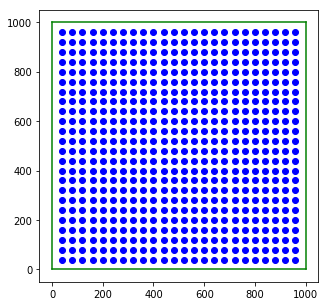

In [5]:
q1 = np.linspace(0, 0, 2)
q2 = np.linspace(0, longitud, 2)
q3 = np.linspace(longitud, longitud, 2)

plt.figure(figsize=(5, 5))
plt.plot(q1, q2, color = 'g')
plt.plot(q3, q2, color = 'g')
plt.plot(q2, q3, color = 'g')
plt.plot(q2, q1, color = 'g')

plt.plot(x1,y1, "bo")

Text(0,0.5,'EJE Y')

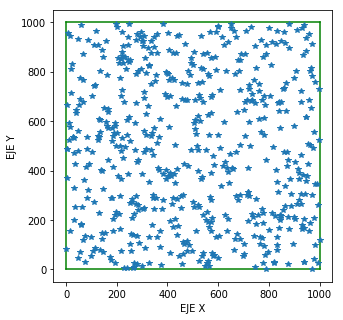

In [6]:
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(q1, q2, color = 'g')
plt.plot(q3, q2, color = 'g')
plt.plot(q2, q3, color = 'g')
plt.plot(q2, q1, color = 'g')
plt.plot(x2,y2, "*")
plt.xlabel("EJE X")
plt.ylabel("EJE Y")

Generamos los histogramas DD, RR y DR con la muestra aleatoria y la ordenada

In [7]:
dmalla0 = distancia(x1, y1) # Calculamos la distancia entre los puntos del arreglo en malla
drandom0 = distancia(x2, y2) # Calculamos la distancia entre los puntos del arreglo de puntos aleatorios
ddr0 = distanciadr(x1, y1, x2, y2) # Calculamos la distancia entre los puntos ordenados y los aleatorios

Buscamos un tamano de bins adecuado

In [9]:
nbins = 18

<Figure size 360x360 with 0 Axes>

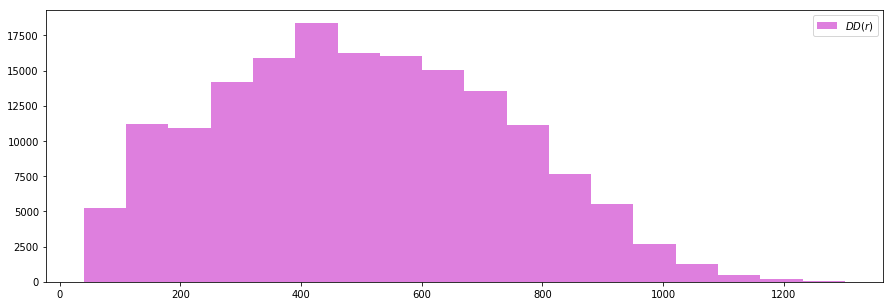

<Figure size 360x360 with 0 Axes>

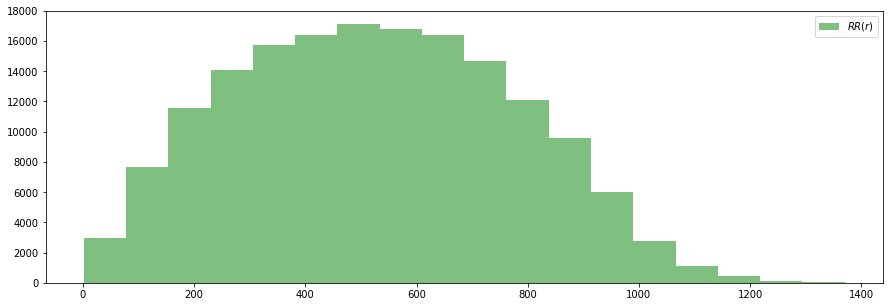

<Figure size 360x360 with 0 Axes>

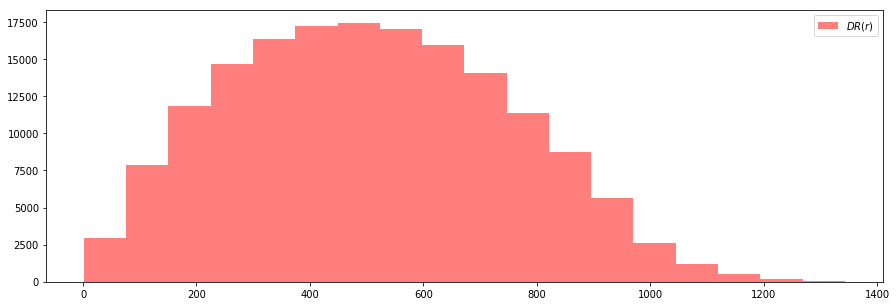

<Figure size 360x360 with 0 Axes>

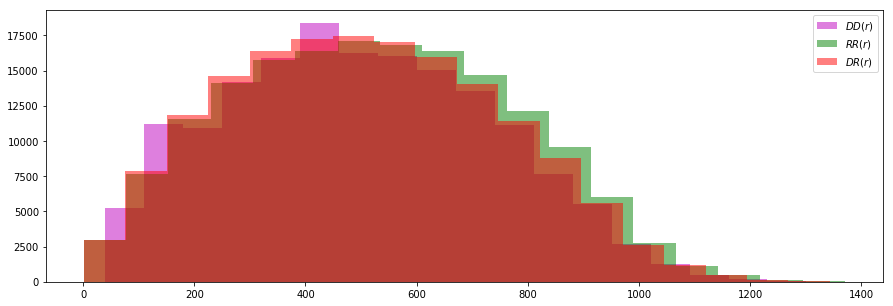

In [39]:
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(dmalla0, bins=nbins, color = 'm' , alpha =0.5, label='$DD(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(drandom0, bins=nbins, color = 'g' , alpha =0.5, label='$RR(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(ddr0, bins=nbins, color = 'r' , alpha =0.5, label='$DR(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(dmalla0, bins=nbins, color = 'm' , alpha =0.5, label='$DD(r)$')
plt.hist(drandom0, bins=nbins, color = 'g' , alpha =0.5, label='$RR(r)$')
plt.hist(ddr0, bins=nbins, color = 'r' , alpha =0.5, label='$DR(r)$')
plt.legend()


Evaluamos las funciones de correlacion y promediamos los histogramas para cada funcion

<Figure size 1080x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

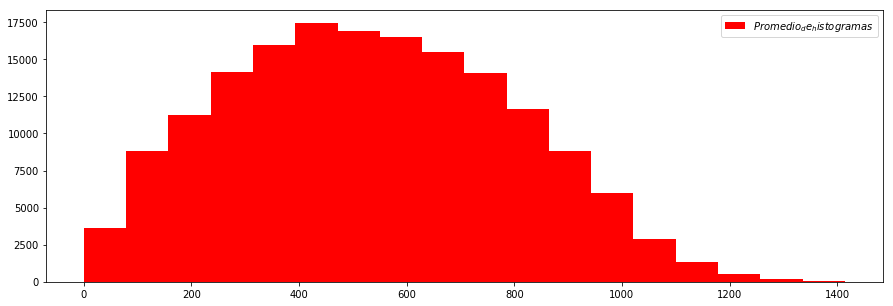

<Figure size 360x360 with 0 Axes>

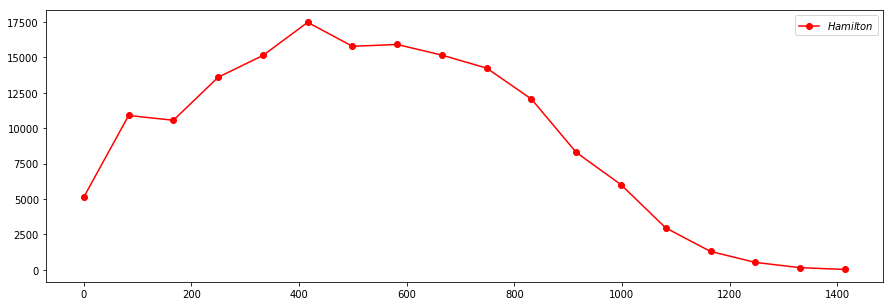

<Figure size 360x360 with 0 Axes>

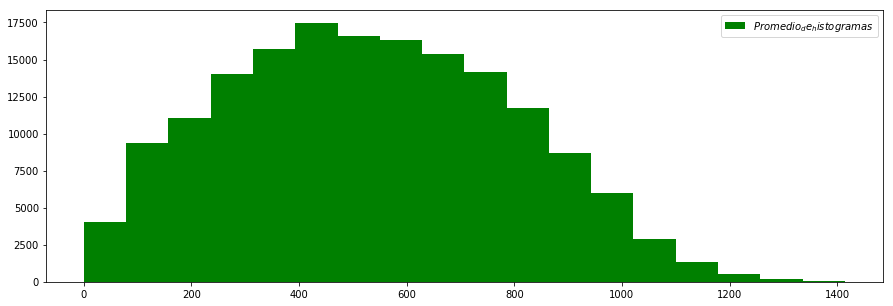

<Figure size 360x360 with 0 Axes>

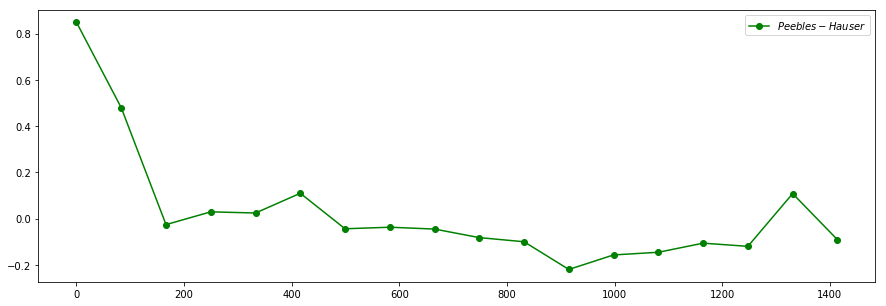

<Figure size 360x360 with 0 Axes>

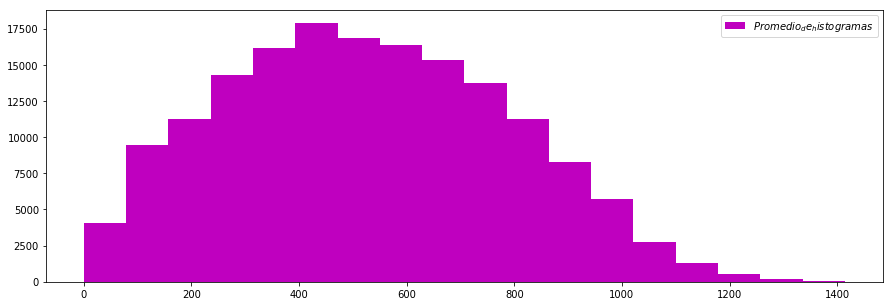

<Figure size 360x360 with 0 Axes>

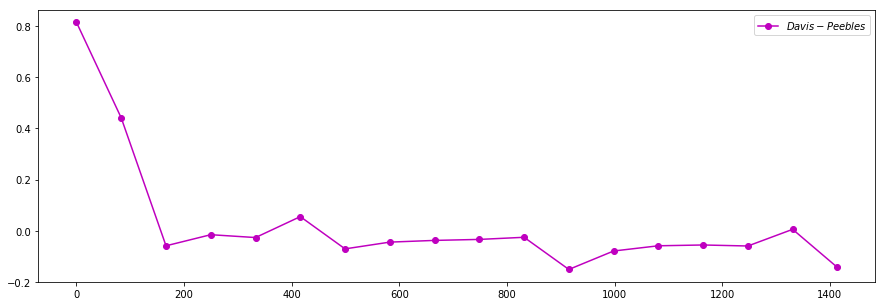

<Figure size 360x360 with 0 Axes>

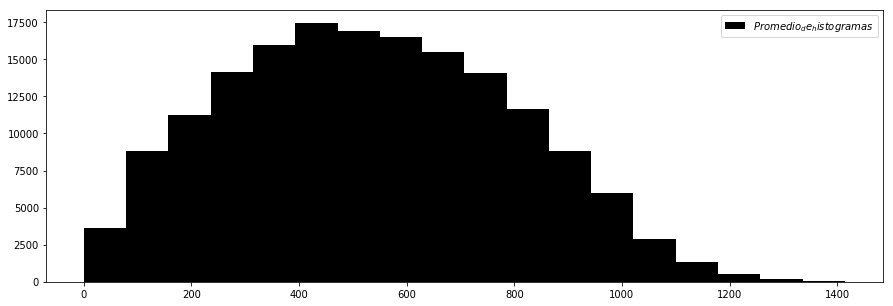

<Figure size 360x360 with 0 Axes>

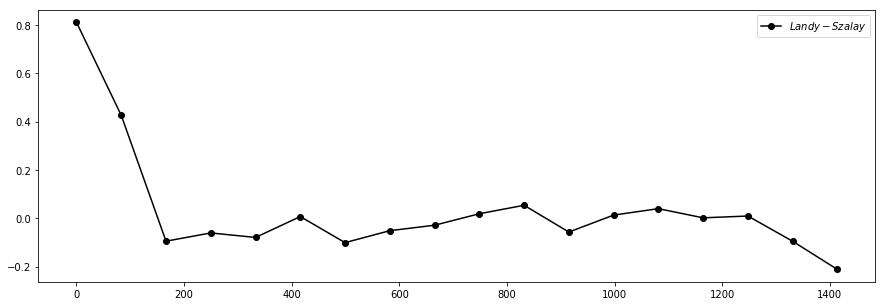

In [52]:
plt.figure(figsize=(15,5))

a1 = fham(x1, y1, x2, y2, longitud, nbins)
a2 = fpeha(x1, y1, x2, y2, longitud, nbins)
a3 = fdape(x1, y1, x2, y2, longitud, nbins)
a4 = flasz(x1, y1, x2, y2, longitud, nbins)

plt.legend()
plt.show()

Promediamos las funciones de correlacion

<Figure size 360x360 with 0 Axes>

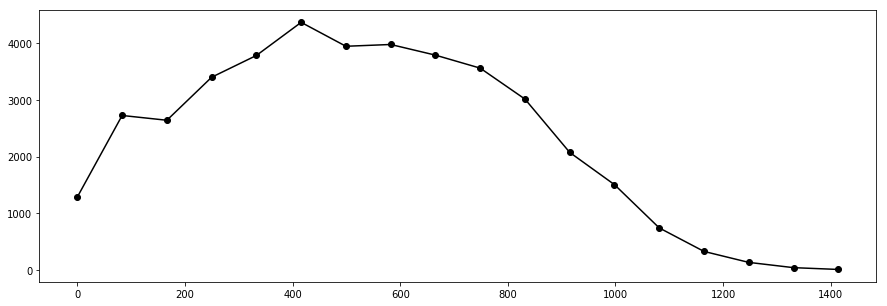

In [66]:
corrprom = a1/4 + a2/4 + a3/4 + a4/4
lmax = np.sqrt(2 * longitud ** 2)
x = np.linspace(0, lmax, len(corrprom))
plt.figure()
plt.figure(figsize=(15,5))
plt.plot(x, corrprom, 'bo-', label='$PromedioCorrelaciones$', color = 'k')

### 5 vez el número de puntos aleatorios que los datos

In [11]:
x3 = np.random.uniform(0, longitud, len(x1) * 5)
y3 = np.random.uniform(0, longitud, len(x1) * 5)

Generamos los histogramas DD, RR y DR con la muestra aleatoria y la ordenada

In [12]:
dmalla1 = distancia(x1, y1) # Calculamos la distancia entre los puntos del arreglo en malla
drandom1 = distancia(x3, y3) # Calculamos la distancia entre los puntos del arreglo de puntos aleatorios
ddr1 = distanciadr(x1, y1, x3, y3) # Calculamos la distancia entre los puntos ordenados y los aleatorios

Buscamos un tamano de bins adecuado

In [13]:
nbins1 = 19

<Figure size 360x360 with 0 Axes>

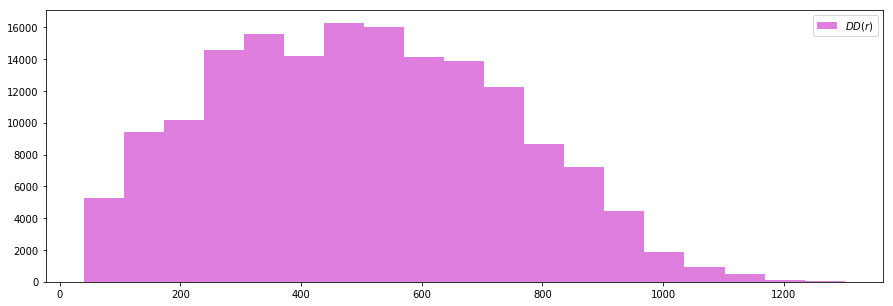

<Figure size 360x360 with 0 Axes>

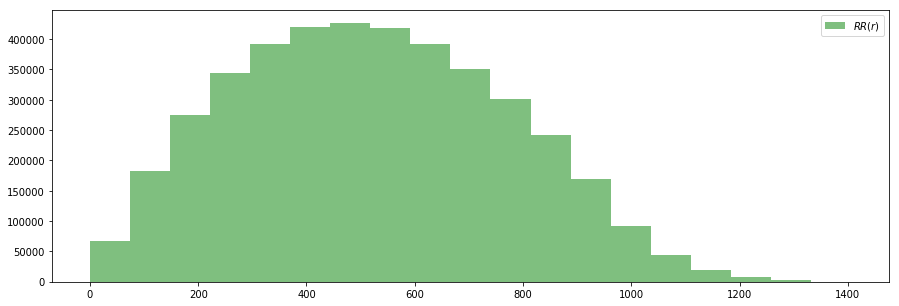

<Figure size 360x360 with 0 Axes>

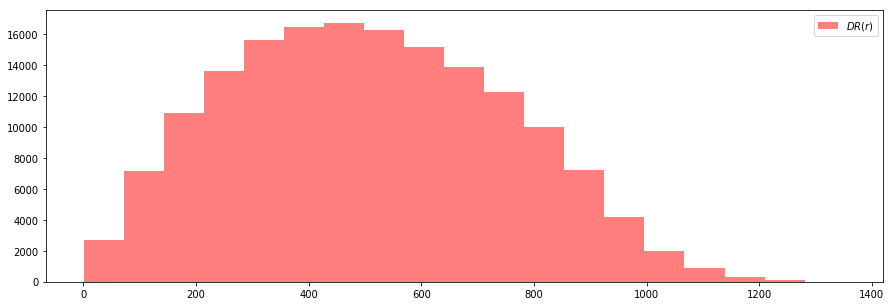

<Figure size 360x360 with 0 Axes>

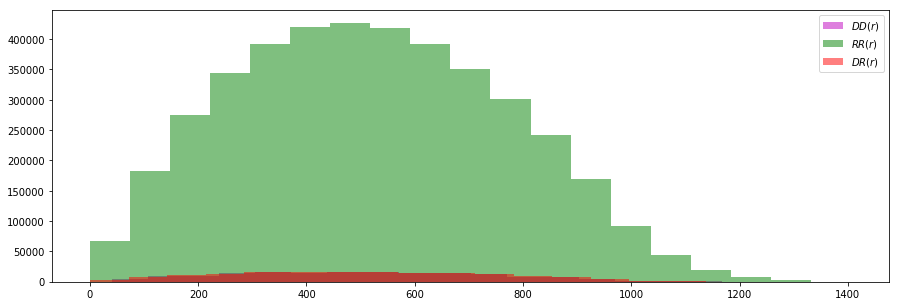

In [18]:
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(dmalla1, bins=nbins1, color = 'm' , alpha =0.5, label='$DD(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(drandom1, bins=nbins1, color = 'g' , alpha =0.5, label='$RR(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(ddr1, bins=nbins1, color = 'r' , alpha =0.5, label='$DR(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(dmalla1, bins=nbins1, color = 'm' , alpha =0.5, label='$DD(r)$')
plt.hist(drandom1, bins=nbins1, color = 'g' , alpha =0.5, label='$RR(r)$')
plt.hist(ddr1, bins=nbins1, color = 'r' , alpha =0.5, label='$DR(r)$')
plt.legend()

<Figure size 1080x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

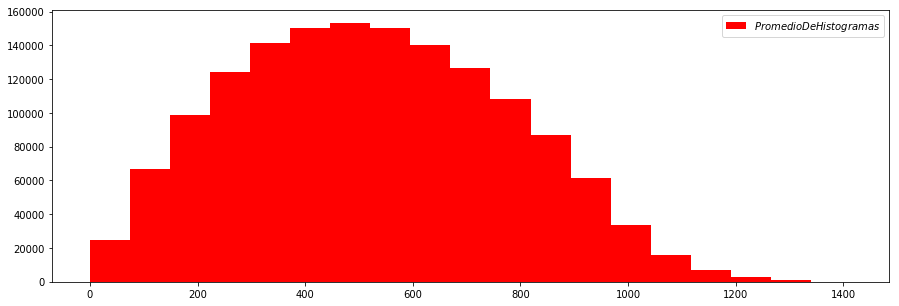

<Figure size 360x360 with 0 Axes>

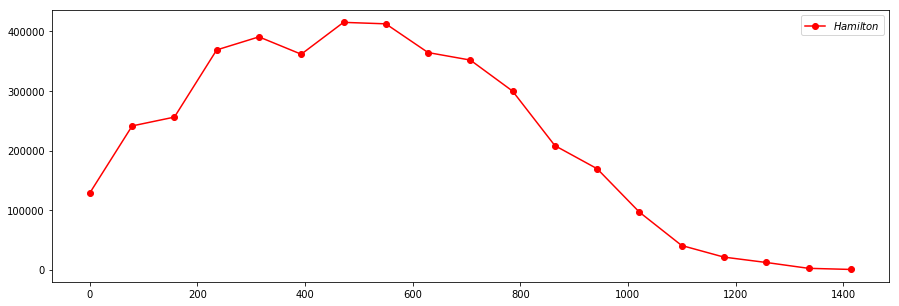

<Figure size 360x360 with 0 Axes>

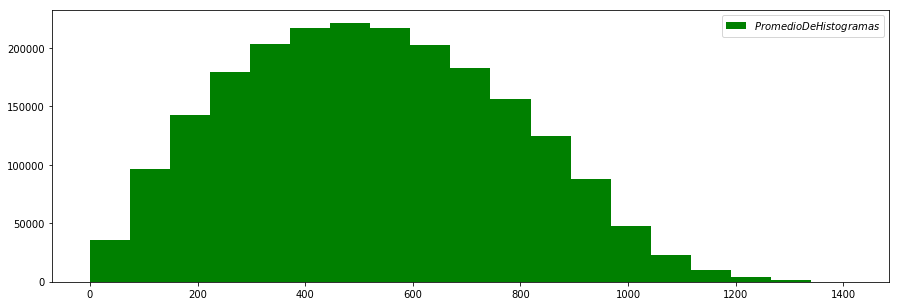

<Figure size 360x360 with 0 Axes>

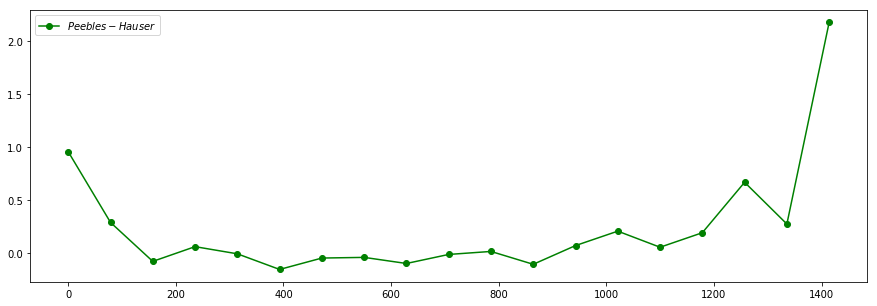

<Figure size 360x360 with 0 Axes>

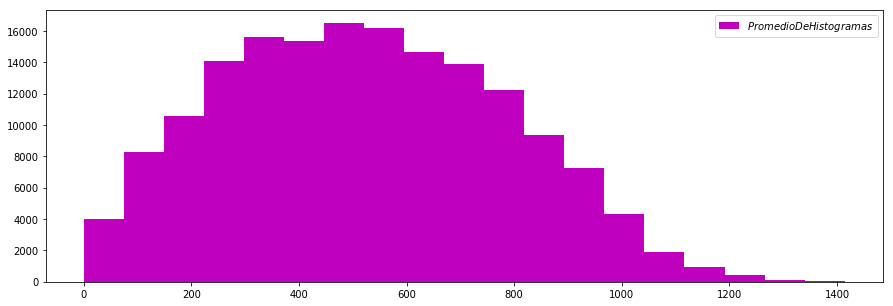

<Figure size 360x360 with 0 Axes>

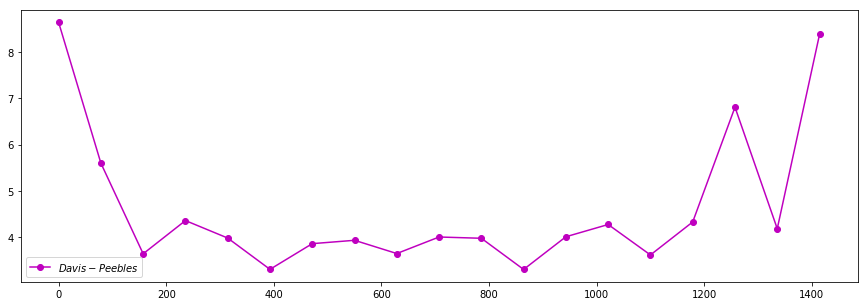

<Figure size 360x360 with 0 Axes>

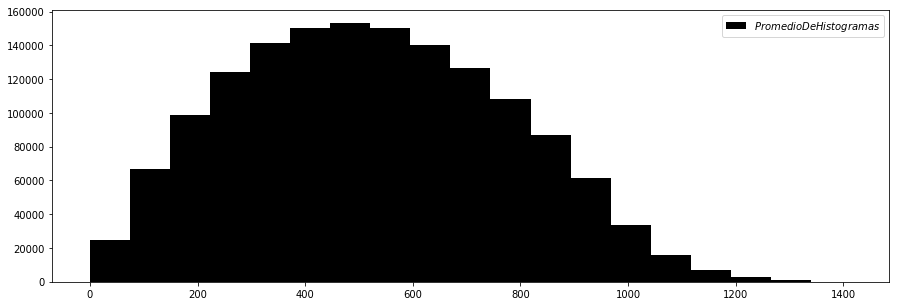

<Figure size 360x360 with 0 Axes>

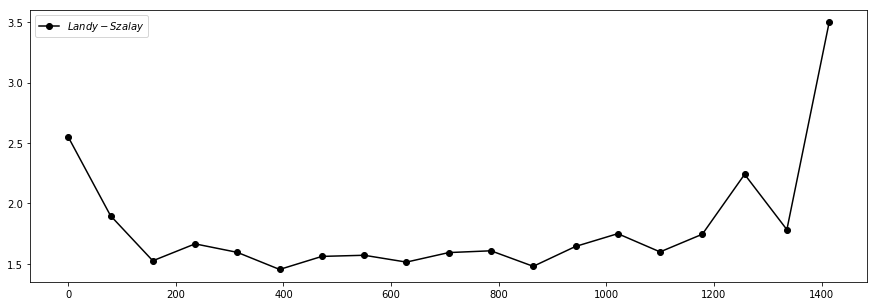

In [72]:
plt.figure(figsize=(15,5))

b1 = fham(x1, y1, x3, y3, longitud, nbins1)
b2 = fpeha(x1, y1, x3, y3, longitud, nbins1)
b3 = fdape(x1, y1, x3, y3, longitud, nbins1)
b4 = flasz(x1, y1, x3, y3, longitud, nbins1)

plt.legend()
plt.show()

Promediamos las funciones de correlacion

<Figure size 360x360 with 0 Axes>

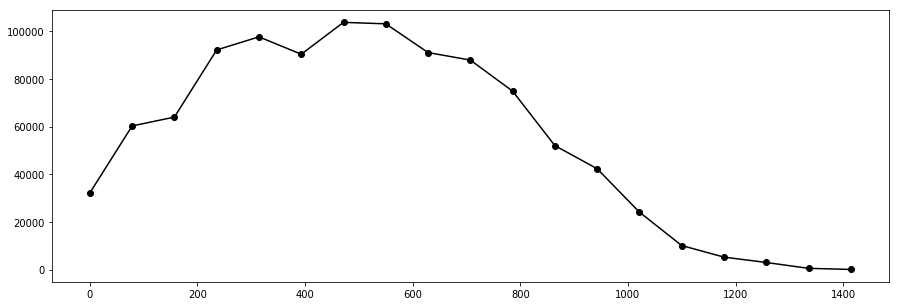

In [73]:
corrprom2 = b1/4 + b2/4 + b3/4 + b4/4
lmax = np.sqrt(2 * longitud ** 2)
x2 = np.linspace(0, lmax, len(corrprom2))
plt.figure()
plt.figure(figsize=(15,5))
plt.plot(x2, corrprom2, 'bo-', label='$PromedioCorrelaciones$', color = 'k')

### 10 vez el número de puntos aleatorios que los datos

In [15]:
x4 = np.random.uniform(0, longitud, len(x1) * 10)
y4 = np.random.uniform(0, longitud, len(x1) * 10)

Generamos los histogramas DD, RR y DR con la muestra aleatoria y la ordenada

In [20]:
dmalla2 = distancia(x1, y1) # Calculamos la distancia entre los puntos del arreglo en malla
drandom2 = distancia(x4, y4) # Calculamos la distancia entre los puntos del arreglo de puntos aleatorios
ddr2 = distanciadr(x1, y1, x4, y4) # Calculamos la distancia entre los puntos ordenados y los aleatorios

Buscamos un tamano de bins adecuado

In [21]:
nbins2 = 32

<Figure size 360x360 with 0 Axes>

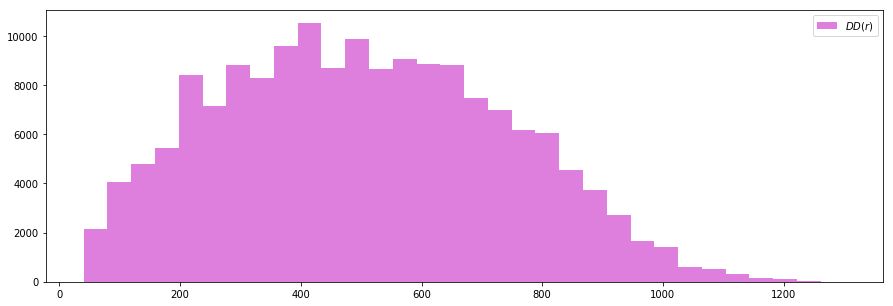

<Figure size 360x360 with 0 Axes>

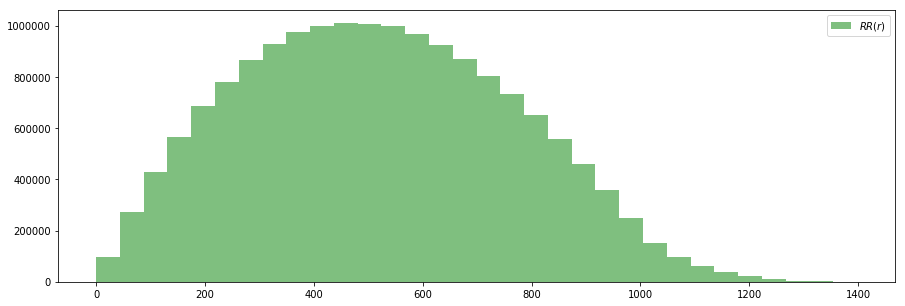

<Figure size 360x360 with 0 Axes>

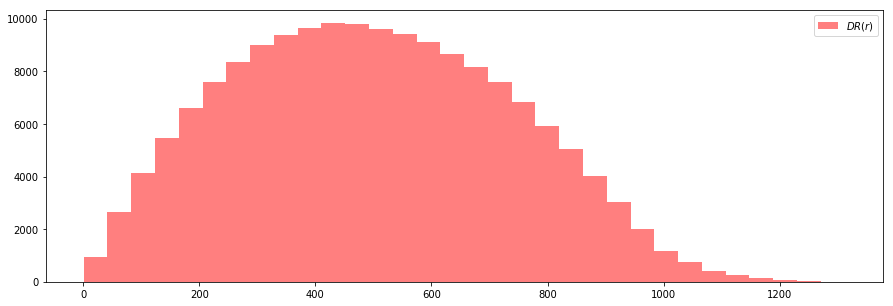

<Figure size 360x360 with 0 Axes>

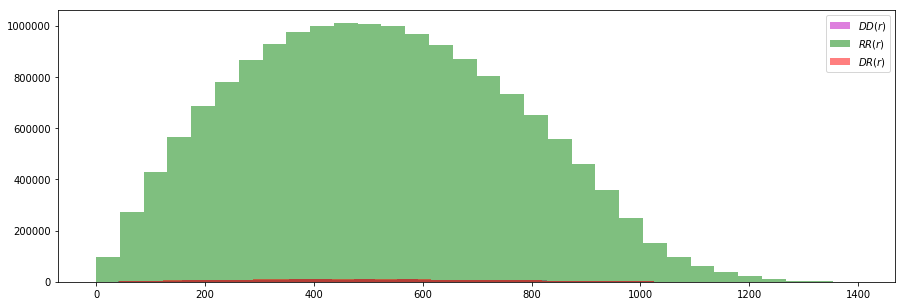

In [22]:
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(dmalla2, bins=nbins2, color = 'm' , alpha =0.5, label='$DD(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(drandom2, bins=nbins2, color = 'g' , alpha =0.5, label='$RR(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(ddr2, bins=nbins2, color = 'r' , alpha =0.5, label='$DR(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(dmalla2, bins=nbins2, color = 'm' , alpha =0.5, label='$DD(r)$')
plt.hist(drandom2, bins=nbins2, color = 'g' , alpha =0.5, label='$RR(r)$')
plt.hist(ddr2, bins=nbins2, color = 'r' , alpha =0.5, label='$DR(r)$')
plt.legend()

<Figure size 1080x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

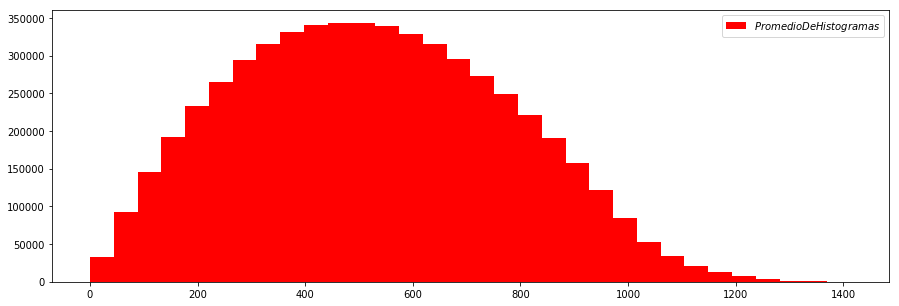

<Figure size 360x360 with 0 Axes>

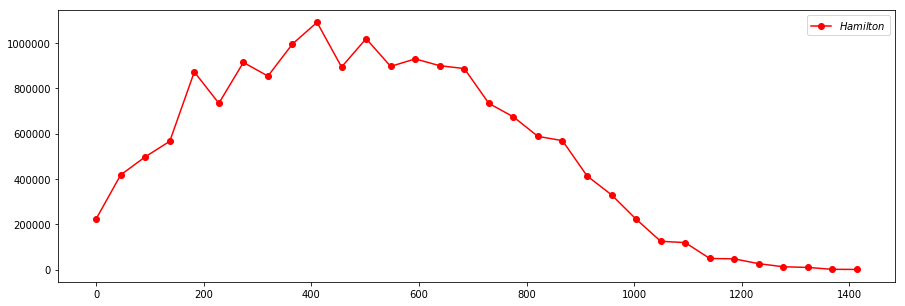

<Figure size 360x360 with 0 Axes>

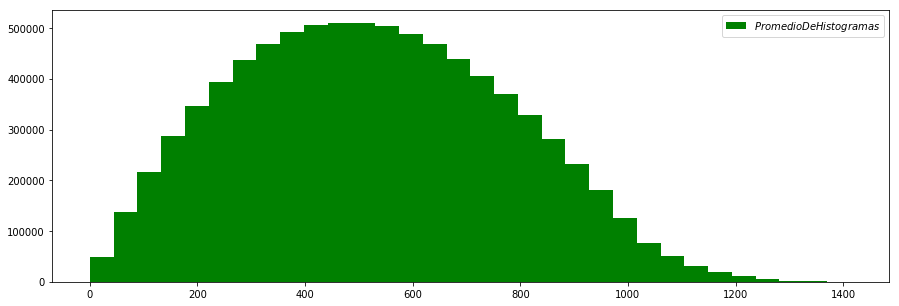

<Figure size 360x360 with 0 Axes>

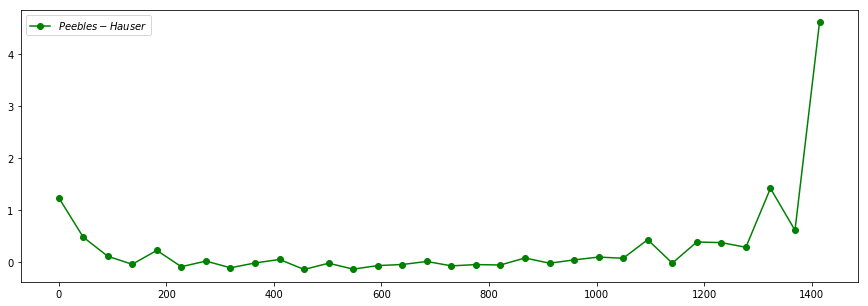

<Figure size 360x360 with 0 Axes>

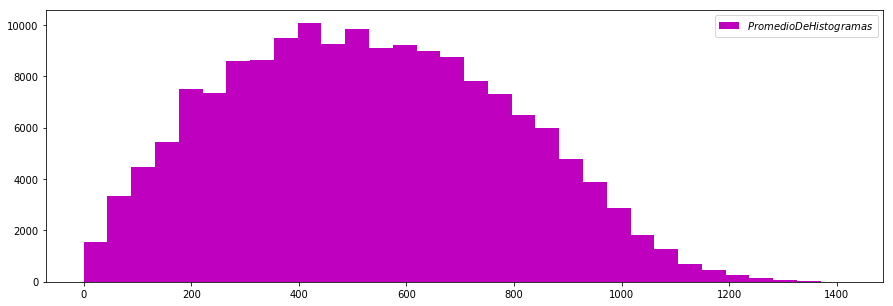

<Figure size 360x360 with 0 Axes>

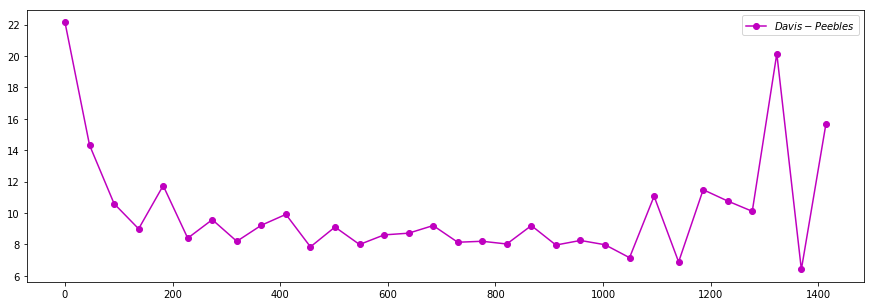

<Figure size 360x360 with 0 Axes>

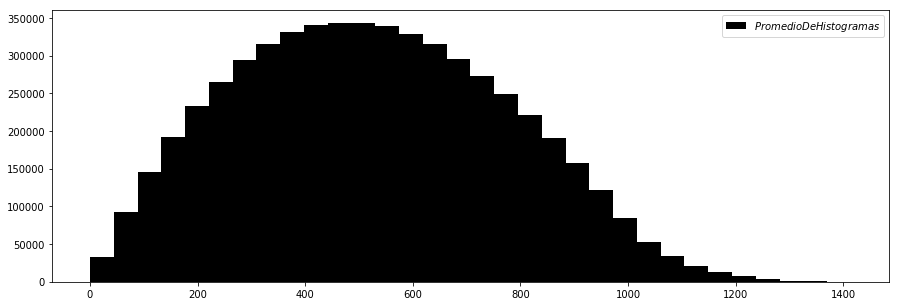

<Figure size 360x360 with 0 Axes>

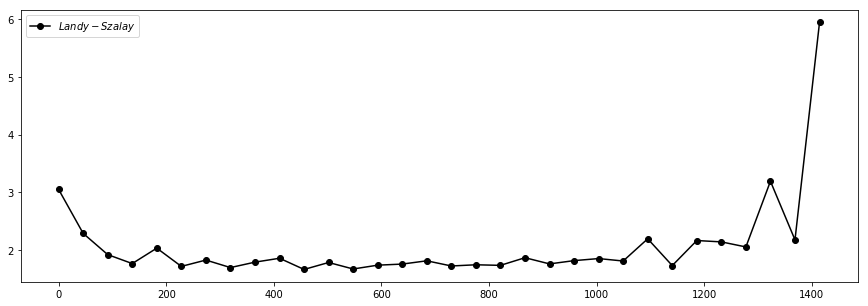

In [74]:
plt.figure(figsize=(15,5))

c1 = fham(x1, y1, x4, y4, longitud, nbins2)
c2 = fpeha(x1, y1, x4, y4, longitud, nbins2)
c3 = fdape(x1, y1, x4, y4, longitud, nbins2)
c4 = flasz(x1, y1, x4, y4, longitud, nbins2)

plt.legend()
plt.show()

Promediamos las funciones de correlacion

<Figure size 360x360 with 0 Axes>

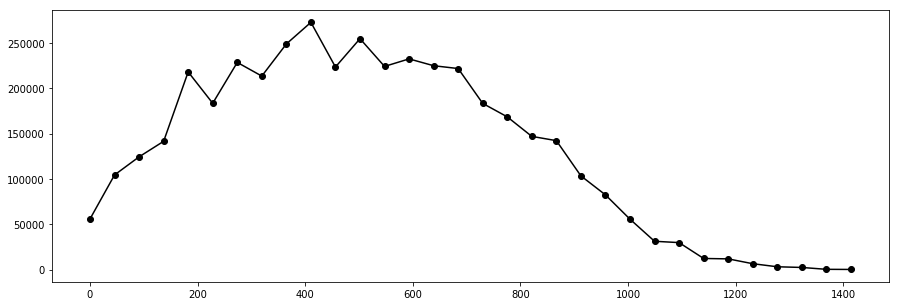

In [75]:
corrprom3 = c1/4 + c2/4 + c3/4 + c4/4
lmax = np.sqrt(2 * longitud ** 2)
x3 = np.linspace(0, lmax, len(corrprom3))
plt.figure()
plt.figure(figsize=(15,5))
plt.plot(x3, corrprom3, 'bo-', label='$PromedioCorrelaciones$', color = 'k')

### 50 vez el número de puntos aleatorios que los datos

In [23]:
x5 = np.random.uniform(0, longitud, len(x1) * 50)
y5 = np.random.uniform(0, longitud, len(x1) * 50)

Generamos los histogramas DD, RR y DR con la muestra aleatoria y la ordenada

In [25]:
dmalla3 = distancia(x1, y1) # Calculamos la distancia entre los puntos del arreglo en malla
drandom3 = distancia(x5, y5) # Calculamos la distancia entre los puntos del arreglo de puntos aleatorios
ddr3 = distanciadr(x1, y1, x5, y5) # Calculamos la distancia entre los puntos ordenados y los aleatorios

Buscamos un tamano de bins adecuado

In [24]:
nbins3 = 27

<Figure size 360x360 with 0 Axes>

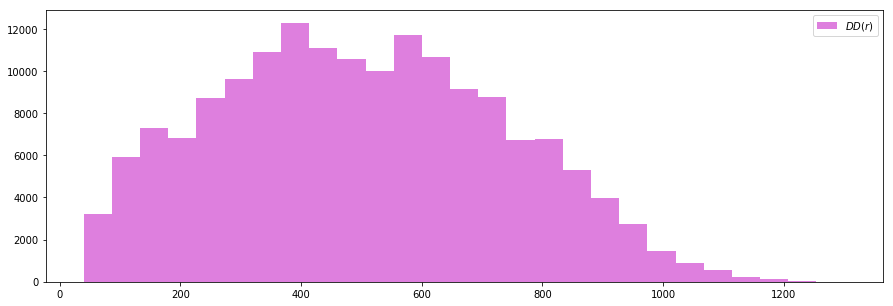

<Figure size 360x360 with 0 Axes>

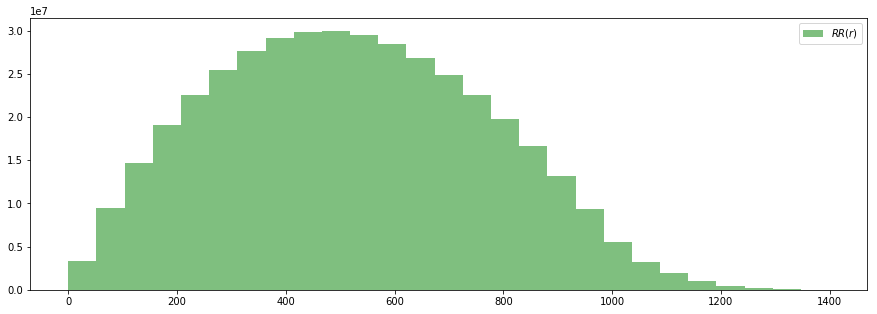

<Figure size 360x360 with 0 Axes>

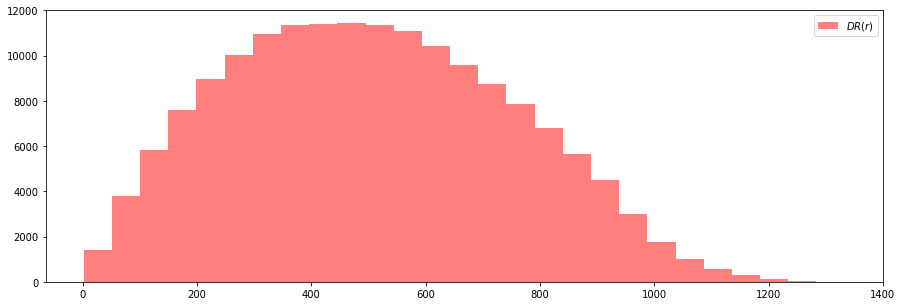

<Figure size 360x360 with 0 Axes>

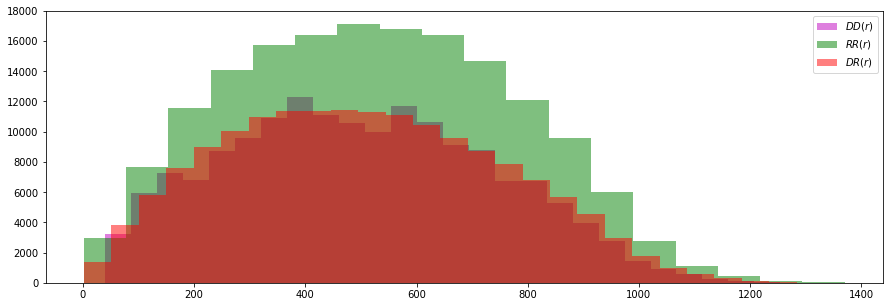

In [80]:
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(dmalla3, bins=nbins3, color = 'm' , alpha =0.5, label='$DD(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(drandom3, bins=nbins3, color = 'g' , alpha =0.5, label='$RR(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(ddr3, bins=nbins3, color = 'r' , alpha =0.5, label='$DR(r)$')
plt.legend()
plt.figure()
plt.figure(figsize=(15,5))
plt.hist(dmalla3, bins=nbins3, color = 'm' , alpha =0.5, label='$DD(r)$')
plt.hist(drandom3, bins=nbins3, color = 'g' , alpha =0.5, label='$RR(r)$')
plt.hist(ddr3, bins=nbins3, color = 'r' , alpha =0.5, label='$DR(r)$')
plt.legend()

<Figure size 1080x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

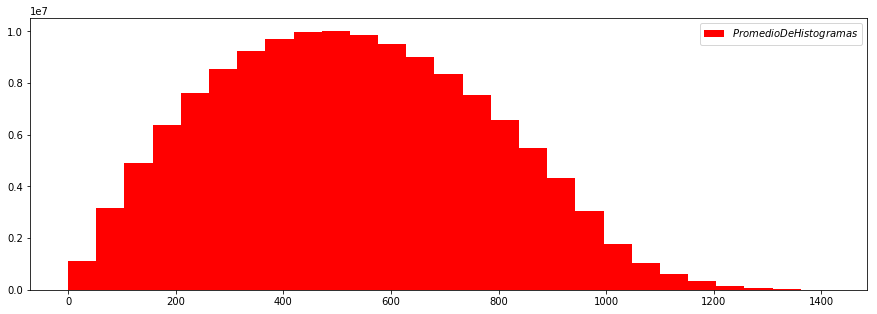

<Figure size 360x360 with 0 Axes>

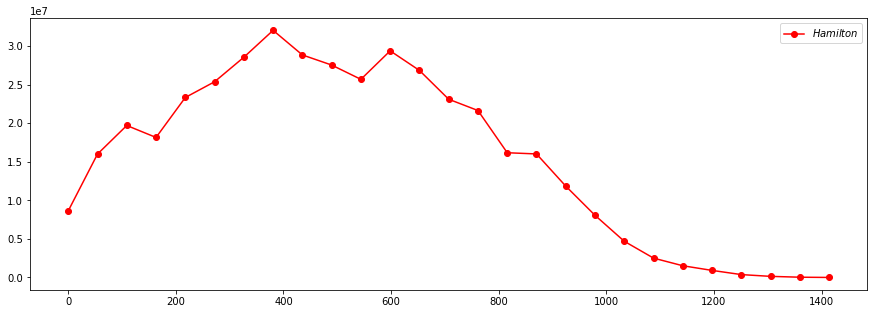

<Figure size 360x360 with 0 Axes>

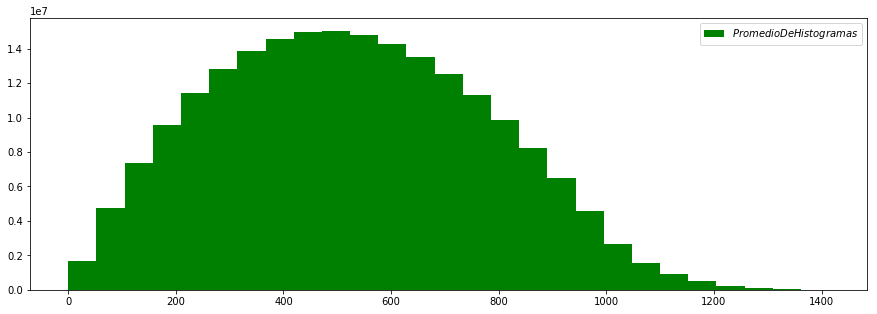

<Figure size 360x360 with 0 Axes>

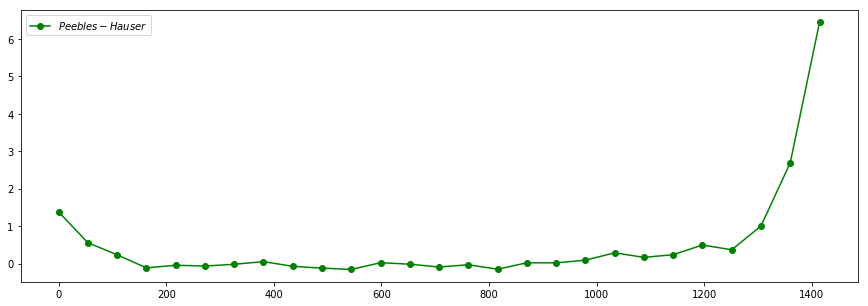

<Figure size 360x360 with 0 Axes>

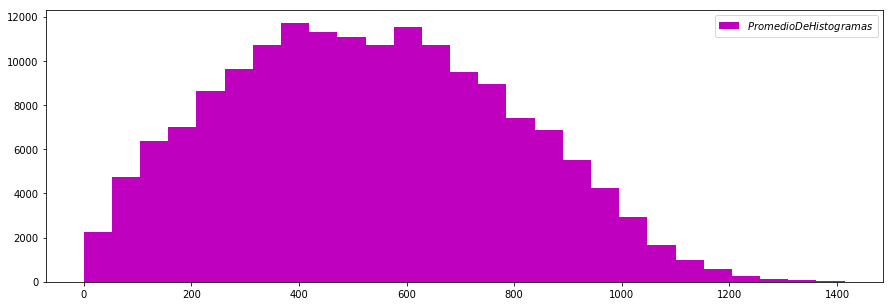

<Figure size 360x360 with 0 Axes>

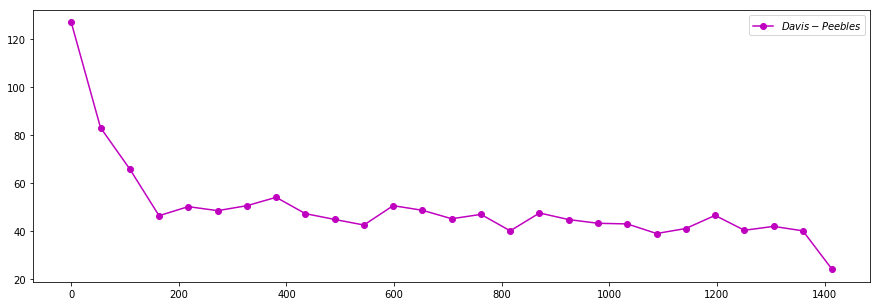

<Figure size 360x360 with 0 Axes>

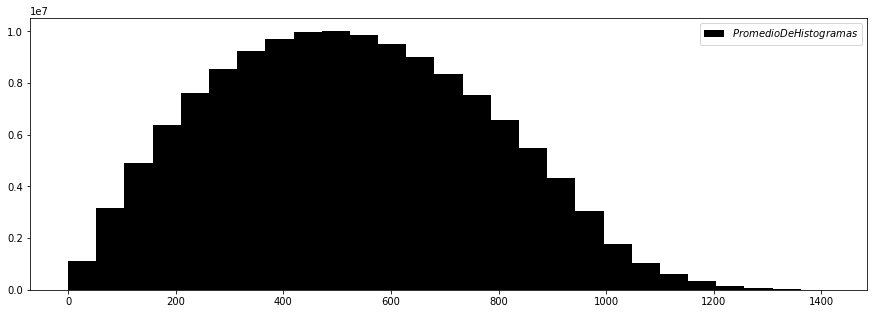

<Figure size 360x360 with 0 Axes>

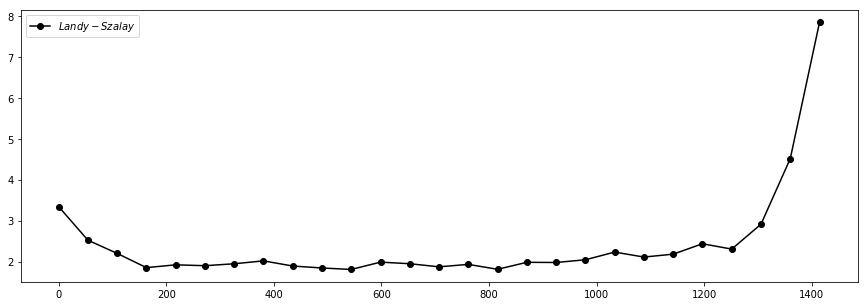

In [77]:
plt.figure(figsize=(15,5))

d1 = fham(x1, y1, x5, y5, longitud, nbins3)
d2 = fpeha(x1, y1, x5, y5, longitud, nbins3)
d3 = fdape(x1, y1, x5, y5, longitud, nbins3)
d4 = flasz(x1, y1, x5, y5, longitud, nbins3)

plt.legend()
plt.show()

Promediamos las funciones de correlacion

In [ ]:
corrprom4 = d1/4 + d2/4 + d3/4 + d4/4
lmax = np.sqrt(2 * longitud ** 2)
x4 = np.linspace(0, lmax, len(corrprom4))
plt.figure()
plt.figure(figsize=(15,5))
plt.plot(x4, corrprom4, 'bo-', label='$PromedioCorrelaciones$', color = 'k')